In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
import pandas as pd 
df=pd. read_csv("gemma_text.csv", encoding='latin1')
df.head(1)

,original_text,rewritten_text,prompt
0,Ganesh (Vijay) is a college graduate who lives...,He gets accepted into a prestigious college.*...,"Rewrite the following passage, scrutinizing it..."


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_text   5937 non-null   object
 1   rewritten_text  5937 non-null   object
 2   prompt          5937 non-null   object
dtypes: object(3)
memory usage: 139.3+ KB


### keywords from the original text

In [97]:
original_text=df['original_text']
text_list = original_text.tolist()

In [98]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
tokens_without_sw = []
for text in text_list:
    text_tokens = nltk.word_tokenize(text)
    tokens_without_sw.append([word for word in text_tokens if not word.lower() in stop_words])

In [99]:
vectorizer = TfidfVectorizer(stop_words='english')
keywords_original_text=[]
for token in tokens_without_sw:
    X = vectorizer.fit_transform(token)
    indices = X.sum(axis=0).argsort()[0, :].tolist()[0]
    features = vectorizer.get_feature_names_out()
    keywords_original_text.append([features[i] for i in indices])
    

In [100]:
len(keywords_original_text)

5937

### keywords from the rewritten_text

In [101]:
rewritten_text=df['rewritten_text']
text_list = rewritten_text.tolist()

In [102]:
# Removing stopwords
tokens_without_sw = []
for text in text_list:
    text_tokens = nltk.word_tokenize(text)
    tokens_without_sw.append([word for word in text_tokens if not word.lower() in stop_words])

In [103]:
all_text = [' '.join(tokens) for tokens in tokens_without_sw]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_text)
features = vectorizer.get_feature_names_out()
keywords_rewritten_text = []
for row in X:
    row_array = row.toarray()[0] 
    indices = row_array.argsort()[:][::-1]  
    keywords_rewritten_text.append([features[i] for i in indices])

In [104]:
len(keywords_rewritten_text)

5937

In [106]:
#Identify Objectives and Constraints
# Convert lists to tuples
keywords_original_set = list(tuple(keyword) for keyword in keywords_original_text)
keywords_rewritten_set = list(tuple(keyword) for keyword in keywords_rewritten_text)


In [107]:
len(keywords_rewritten_set)

5937

## findind shared key words

In [108]:
shared_keywords=[]
for i,j in zip(keywords_original_set,keywords_rewritten_set):
    shared_keywords.append(set(i)&set(j))
print(shared_keywords[0])

{'ends', 'day', 'abuses', 'performing', 'broken', 'vain', 'friend', 'try', 'rest', 'rites', 'gold', 'tells', 'ganesh', 'time', 'sandhya', 'officer', 'waiting', 've', 'friends', 'going', 'recommendation', 'leaves', 'gets', 'strict', 'karan', 'affair', 'father', 'finds', 'heart', 'wants', 'lost', 'whereabouts', 'grave', 'leave', 'everyday', 'arrives', 'loves', 'roaming', 'tries', 'rajan', 'waste', 'takes', 'town', 'vijay', 'come', 'written', 'accident', 'son', 'suspicious', 'doctor', 'degree', 'sight', 'hold', 'perform', 'worth', 'life', 'forced', 'glimpse', 'confronts', 'mind', 'standing', 'lives', 'physical', 'love', 'interview', 'ambition', 'medal', 'uses', 'ravi', 'talk', 'easy', 'stop', 'feelings', 'death', 'feeling', 'police', 'goes', 'trace', 'passes', 'point', 'disappoint', 'convince', 'dev', 'marry', 'daughter', 'spend', 'tell', 'fall', 'chance', 'desperately', 'peter', 'reveals', 'trying', 'force', 'spots', 'advice', 'college', 'innocence', 'bus', 'raghuvaran', 'away', 'verball

In [109]:
print(shared_keywords[-1])

{'writes', 'earn', 'hand', 'setbacks', 'submits', 'write', 'father', 'writing', 'life', 'introverted', 'forced', 'moves', 'breaks', 'duffy', 'mother', 'manchester', 'johnny', 'start', 'wants', 'shows', 'music', 'loner', 'lyrics', 'listen', 'eventually', '1970s', 'singing', 'friend', 'tries', 'linder', 'reviews', 'letters', 'withdrawn', 'billy', 'night', 'quite', 'patrick', 'sterling', 'doorstep', 'sullen', 'society', 'steven', 'newspapers', 'young', 'artist', 'songs', 'end', 'teen', 'morrissey', 'passion', 'continue', 'shy', 'fit', 'form', 'mount', 'enjoys', 'local', 'inspires', 'frustrations', 'london', 'rope', 'growing', 'marr', 'perform', 'urges', 'follow', 'goes', 'living', 'job', 'guitarist', 'dissatisfied', 'know', 'changes', 'film'}


In [46]:
print(len(shared_keywords))

5937


## finding unique key words

In [110]:
unique_keywords=[]
for i,j in zip(keywords_original_set,keywords_rewritten_set):
    unique_keywords.append(set(i)-set(j))
print(unique_keywords[0])

{'chadrasekhar', 'manthra', 'suvalakshmi', 'pampers', 'sriman', 'fathima', 'unmovable', 'preethi'}


In [111]:
print(unique_keywords[-1])

{'substantially', 'smiths', '1982'}


In [112]:
print(len(unique_keywords))

5937


In [113]:
prompt_list = []
for i, j,z in zip(shared_keywords, unique_keywords,df['original_text']):
    prompt = "Rewrite the following passage : "+ z +"\nfocusing on " + ", ".join(i)
    if j:
        prompt += "\nand introduce elements like " + ", ".join(j)
    prompt_list.append(prompt)

print(prompt_list[0])

Rewrite the following passage : Ganesh (Vijay) is a college graduate who lives with his father, Chadrasekhar (Raghuvaran), who is a doctor. Ganesh's father is easy going and pampers his son with whatever he wants. Sandhya (Suvalakshmi) is a daughter of a very strict police officer Vasudevan (Rajan P. Dev), who is always suspicious that his daughter would have a love affair. Sandhya makes up her mind that she would never fall in love and disappoint her father and her ambition is to get a gold medal in her college degree.
One day Ganesh spots Sandhya and falls in love at first sight. Even though Sandhya catches a good glimpse of him, she tells her friend Fathima she likes no one. Ganesh goes to the bus stop everyday to see Sandhya. He tries to get the advice his friends Ravi (Sriman) and Peter (Karan) to convince Sandhya to marry him. Their advices go in vain as she does not care about him. She confronts Ganesh one day and tells him not to waste his time on her.
Ganesh does not give up a

In [114]:
print(prompt_list[-1])

Rewrite the following passage : Young, introverted Steven Patrick Morrissey is a sullen, dissatisfied, and shy teen growing up in Manchester in the 1970s. Withdrawn and a loner, he goes out to listen to music at night and then submits letters and reviews to local music newspapers. His father wants him to get a job, his mother wants him to follow his passion for writing, and Steven doesn't quite know what he wants to do. His friend artist Linder Sterling inspires him to continue to write lyrics and urges him to start to perform, but she eventually moves to London. Forced to earn a living and fit in with society, Steven's frustrations and setbacks continue to mount. Although he eventually writes some songs with guitarist Billy Duffy until Duffy breaks it off, and he tries his hand at singing and enjoys it, nothing substantially changes in his life, and Steven seems at the end of his rope. At the end of the film, guitarist Johnny Marr (with whom he would go on to form The Smiths) shows up

In [115]:
print(len(prompt_list))

5937


In [116]:
df['Rewritten-prompt']=prompt_list

In [117]:
df.head()

,original_text,rewritten_text,prompt,Rewritten-prompt
0,Ganesh (Vijay) is a college graduate who lives...,He gets accepted into a prestigious college.*...,"Rewrite the following passage, scrutinizing it...",Rewrite the following passage : Ganesh (Vijay)...
1,This is a story of a boy and girl who meet for...,"The humid air hung thick in the air, carrying ...","Rewrite the given text, incorporating sensory ...",Rewrite the following passage : This is a stor...
2,Harry is the manager of a tag team of gorgeous...,This passage could be rewritten to reflect the...,"Rewrite the following passage, aligning it wit...",Rewrite the following passage : Harry is the m...
3,"Based on a true story, the film is set in the ...",The film depicts the complexities of the human...,Rewrite the given text by enhancing its clarit...,Rewrite the following passage : Based on a tru...
4,Pounrasu (Vineeth) has a brother Kottaisaamy (...,"Pounrasu, a young man from a humble background...","Rewrite the following passage, amplifying the ...",Rewrite the following passage : Pounrasu (Vine...


### cosine similarity between prompt and rewritten prompt

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


original_prompts = df['prompt'].tolist()
rewritten_prompts = df['Rewritten-prompt'].tolist()


vectorizer = TfidfVectorizer()
tfidf_vectors_original = vectorizer.fit_transform(original_prompts)
tfidf_vectors_rewritten = vectorizer.transform(rewritten_prompts)
cosine_similarities = cosine_similarity(tfidf_vectors_original, tfidf_vectors_rewritten)

similarity=[]
for i in range(len(cosine_similarities)):
    similarity.append(cosine_similarities[i][i])
    print(f"Similarity between prompt {i+1} and its rewritten prompt: {cosine_similarities[i][i]}")


Similarity between prompt 1 and its rewritten prompt: 0.06767344093991283
Similarity between prompt 2 and its rewritten prompt: 0.04177597225961656
Similarity between prompt 3 and its rewritten prompt: 0.10153329771833837
Similarity between prompt 4 and its rewritten prompt: 0.09231264293897837
Similarity between prompt 5 and its rewritten prompt: 0.08541361365478492
Similarity between prompt 6 and its rewritten prompt: 0.2800753337273201
Similarity between prompt 7 and its rewritten prompt: 0.132344727306748
Similarity between prompt 8 and its rewritten prompt: 0.13586093788254544
Similarity between prompt 9 and its rewritten prompt: 0.05232236989728151
Similarity between prompt 10 and its rewritten prompt: 0.08833114063993848
Similarity between prompt 11 and its rewritten prompt: 0.0722998326193669
Similarity between prompt 12 and its rewritten prompt: 0.19444938112019886
Similarity between prompt 13 and its rewritten prompt: 0.07099989489605953
Similarity between prompt 14 and its r

In [119]:
len(similarity)

5937

In [120]:
df['similarity']=similarity

In [121]:
df.head()

,original_text,rewritten_text,prompt,Rewritten-prompt,similarity
0,Ganesh (Vijay) is a college graduate who lives...,He gets accepted into a prestigious college.*...,"Rewrite the following passage, scrutinizing it...",Rewrite the following passage : Ganesh (Vijay)...,0.067673
1,This is a story of a boy and girl who meet for...,"The humid air hung thick in the air, carrying ...","Rewrite the given text, incorporating sensory ...",Rewrite the following passage : This is a stor...,0.041776
2,Harry is the manager of a tag team of gorgeous...,This passage could be rewritten to reflect the...,"Rewrite the following passage, aligning it wit...",Rewrite the following passage : Harry is the m...,0.101533
3,"Based on a true story, the film is set in the ...",The film depicts the complexities of the human...,Rewrite the given text by enhancing its clarit...,Rewrite the following passage : Based on a tru...,0.092313
4,Pounrasu (Vineeth) has a brother Kottaisaamy (...,"Pounrasu, a young man from a humble background...","Rewrite the following passage, amplifying the ...",Rewrite the following passage : Pounrasu (Vine...,0.085414


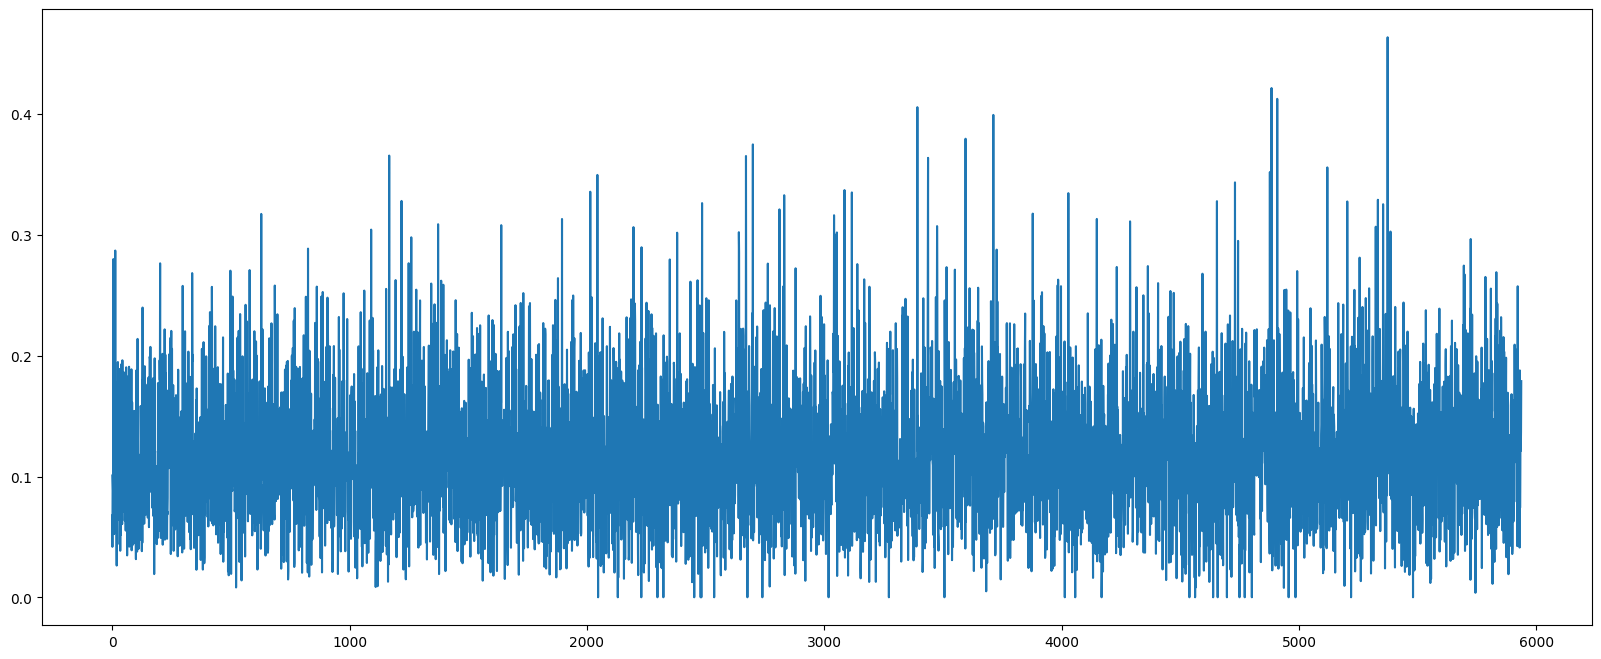

In [122]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(similarity)

plt.show()


In [ ]:
df.to_csv("gemma_text_final.csv", index=False)